In [9]:
from operator import pos
from networkx.algorithms.community import greedy_modularity_communities
from numpy import short
import networkx.algorithms.community as nx_comm

import numpy as np
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import collections
import matplotlib.pyplot as plt
import networkx as nx
import collections

from datetime import time

from turtle import pd
from networkx.algorithms.community.centrality import girvan_newman
import time
import itertools

## 1.1 Reading the network and extracting its features

In [2]:
G = nx.read_edgelist("DD_g172.edges")

edges = G.number_of_edges()
nodes = G.number_of_nodes()
print("Graph with ", nodes, "nodes and ", edges, "edges.")
print("Is directed:", nx.is_directed(G))
print("Is weighted:", nx.is_weighted(G))
print("Number of connected components", nx.number_connected_components(G))
print("Degrees:\n", (nx.degree(G)))
print("average shortest path: ", nx.average_shortest_path_length(G))

Graph with  129 nodes and  309 edges.
Is directed: False
Is weighted: False
Number of connected components 1
Degrees:
 [('2', 2), ('1', 3), ('110', 3), ('111', 5), ('3', 2), ('116', 2), ('5', 6), ('4', 7), ('6', 8), ('7', 6), ('8', 5), ('9', 5), ('10', 3), ('11', 5), ('56', 5), ('57', 4), ('58', 5), ('115', 9), ('117', 4), ('87', 6), ('35', 5), ('13', 3), ('12', 8), ('14', 4), ('15', 7), ('16', 7), ('17', 7), ('19', 7), ('20', 7), ('69', 6), ('126', 3), ('21', 7), ('106', 5), ('108', 6), ('26', 7), ('28', 7), ('30', 5), ('32', 4), ('18', 7), ('100', 6), ('101', 6), ('102', 4), ('23', 6), ('22', 3), ('24', 5), ('25', 3), ('67', 7), ('113', 5), ('120', 4), ('93', 5), ('95', 4), ('98', 7), ('112', 4), ('27', 6), ('29', 6), ('31', 3), ('45', 6), ('47', 7), ('48', 6), ('51', 2), ('34', 4), ('33', 4), ('36', 3), ('37', 5), ('91', 7), ('107', 3), ('39', 7), ('38', 6), ('40', 5), ('41', 7), ('42', 5), ('43', 7), ('44', 7), ('78', 4), ('92', 3), ('94', 4), ('128', 3), ('59', 4), ('96', 3), ('97

## 1.2 Network Visualisation 

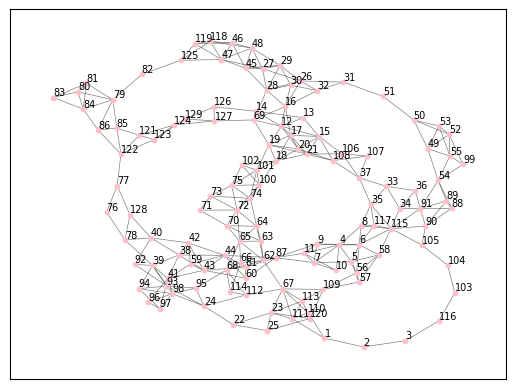

In [3]:
pos = nx.kamada_kawai_layout(G)
node_options = {"node_color": "pink", "node_size": 10}
edge_options = {"width": .5, "alpha": .5, "edge_color": "black"}
node_label_options = {"font_size": 7,
                      "font_color": "black",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
nx.draw_networkx_labels(G, pos, **node_label_options)
plt.show()



## 2.1 Centralities (betweeness, closeness, eigenvector)

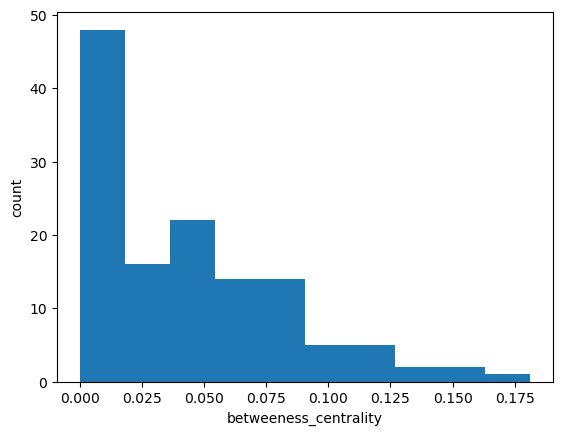

In [4]:
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.xlabel('betweeness_centrality')
plt.ylabel('count')
plt.show()

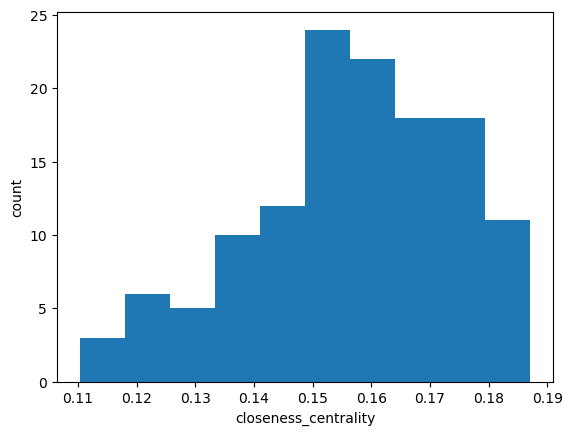

In [5]:
plt.hist(list(nx.closeness_centrality(G).values()))
plt.xlabel('closeness_centrality')
plt.ylabel('count')
plt.show()

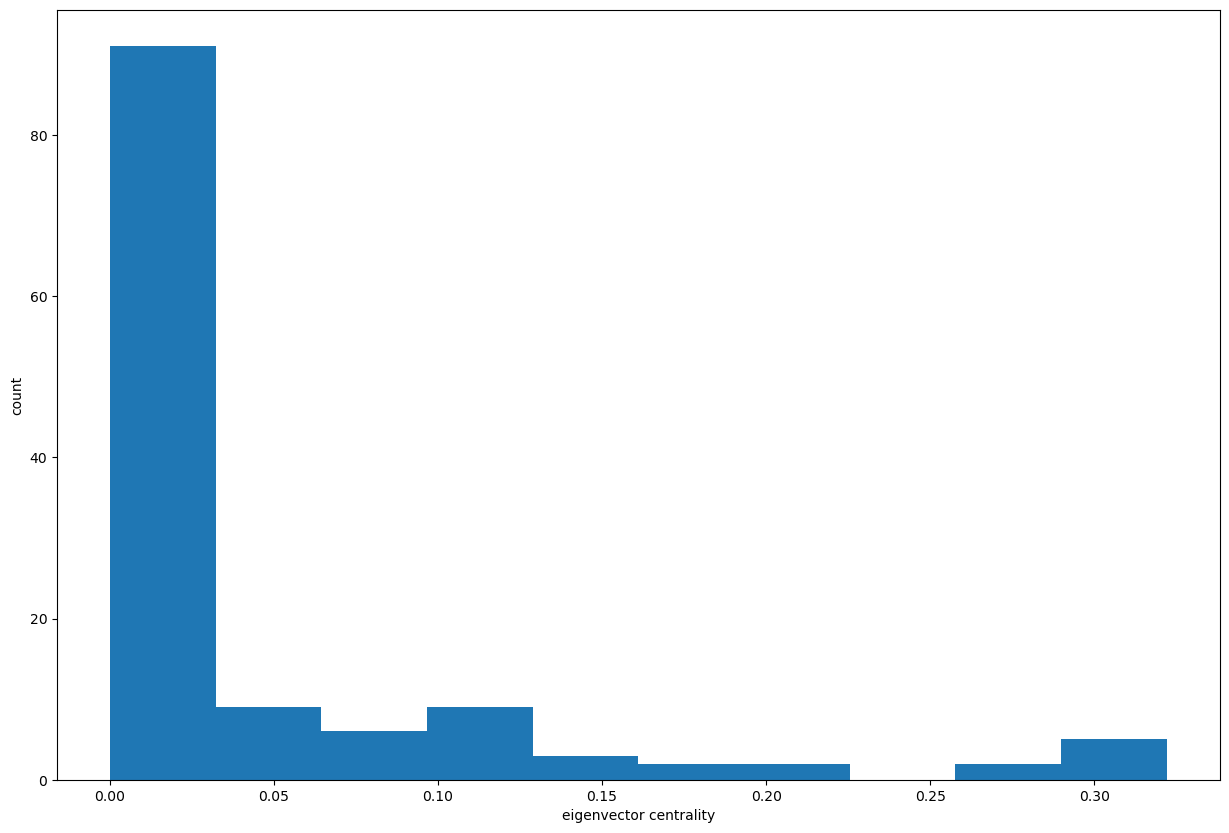

In [13]:
plt.hist(list(nx.eigenvector_centrality(G).values()))
plt.xlabel('eigenvector centrality')
plt.ylabel('count')
plt.show()

## 2.2 Clustering

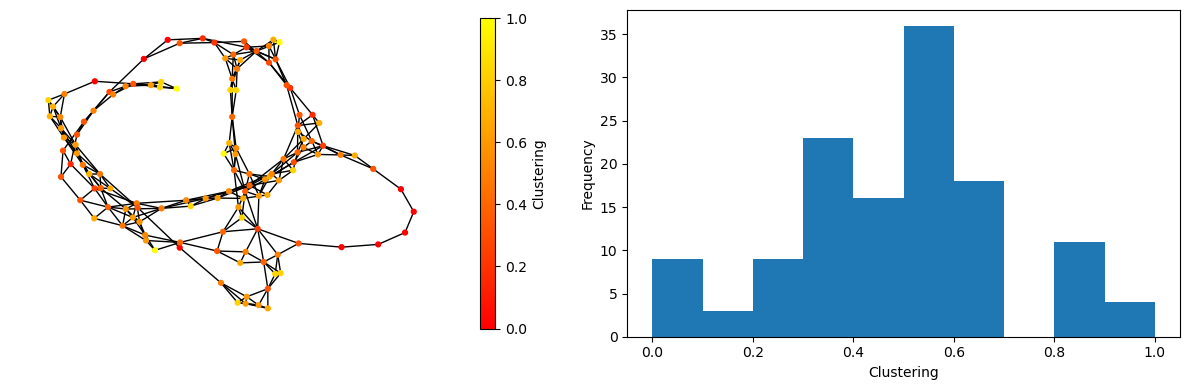

In [18]:
gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(gc)
cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, node_size=12, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

## 2.3 Degree distribution

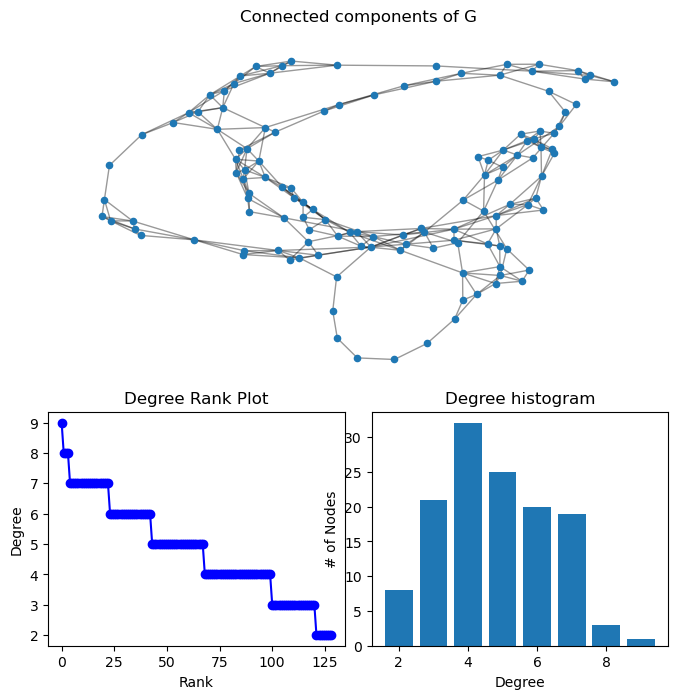

In [17]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
plt.show()

## 3. Community detection

## 3.1 Finding communities with Modularity and plot communities

[frozenset({'19', '16', '20', '46', '28', '106', '119', '21', '107', '108', '12', '17', '82', '45', '69', '125', '27', '15', '118', '30', '47', '26', '48', '14', '37', '32', '29', '13'}), frozenset({'34', '33', '6', '90', '89', '10', '115', '4', '91', '57', '9', '36', '7', '87', '8', '117', '88', '58', '11', '35', '5', '56', '54'}), frozenset({'78', '61', '98', '94', '44', '76', '39', '95', '93', '77', '128', '41', '24', '43', '42', '97', '92', '96', '60', '59', '38', '40'}), frozenset({'100', '101', '102', '114', '112', '74', '75', '71', '73', '70', '68', '62', '66', '18', '72', '65', '63', '64'}), frozenset({'2', '103', '110', '22', '116', '1', '104', '3', '67', '105', '120', '111', '109', '113', '25', '23'}), frozenset({'129', '86', '81', '124', '122', '85', '83', '79', '84', '121', '127', '123', '80', '126'}), frozenset({'51', '49', '55', '52', '53', '99', '31', '50'})]
The graph has 7 communities.
modularity:  0.7373194667001812


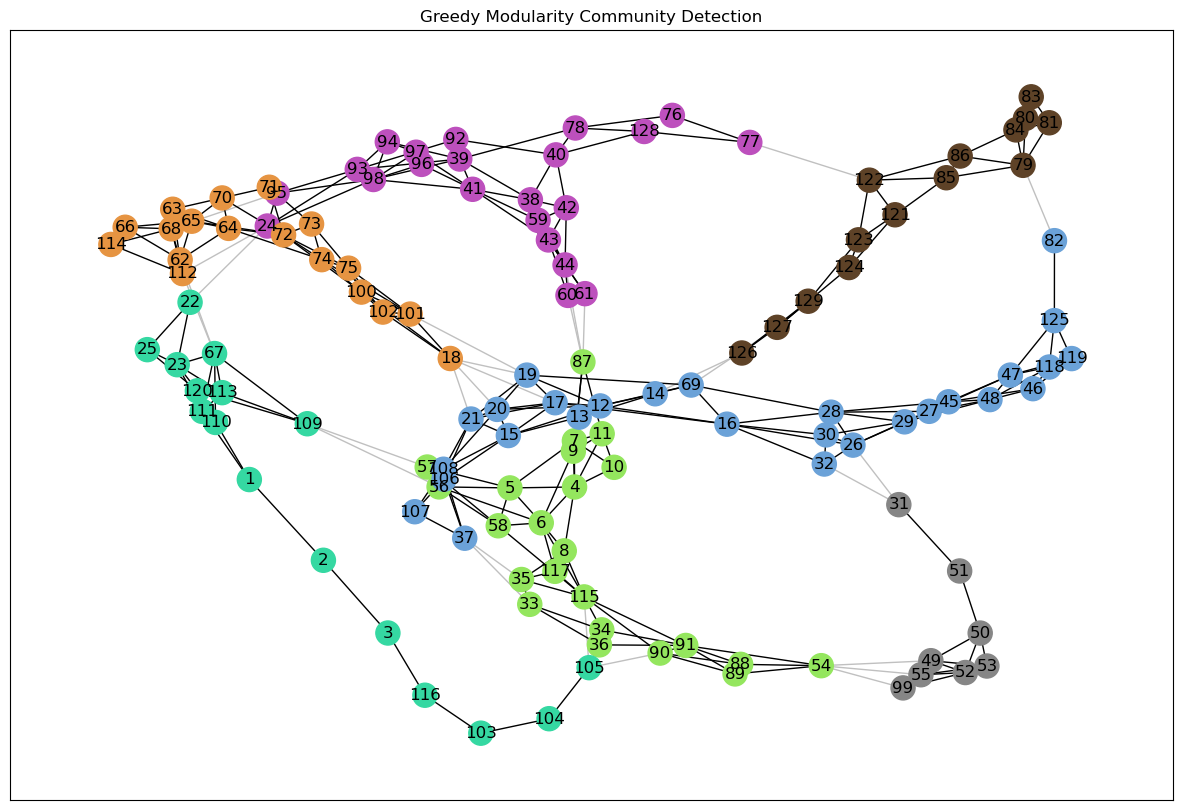

execute time: 0.02721095085144043


In [19]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
import time

# get the start time
st = time.time()
G = nx.read_edgelist("DD_g172.edges")
# Find the communities

communities = sorted(nx_comm.greedy_modularity_communities(G), key=len, reverse=True)
print(communities)

#get the end time
# Count the communities
print(f"The graph has {len(communities)} communities.")
et = time.time()
############
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1


def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0


def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)


# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

karate_pos = nx.spring_layout(G)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
plt.title("Greedy Modularity Community Detection")
nx.draw_networkx(
    G,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
    with_labels=False)
print("modularity: ", nx_comm.modularity(G, communities))
plt.show()

# get the execution time
elapsed_time = et - st
print("execute time:", elapsed_time)


## 3.2 Setting communities to Girvan Newman and calculating modularity

In [20]:
st = time.time()

graph = nx.read_edgelist("DD_g172.edges")
k = 7

girvan_newman_communities = list(girvan_newman(graph))

limited = itertools.takewhile(lambda c: len(c) <= k, girvan_newman_communities)
et = time.time()
#for communities in limited:
    #print(tuple(sorted(c) for c in communities))



mod = (nx_comm.modularity(graph,communities))

print("modularity:", mod)
# get the execution time
elapsed_time = et - st
print("execute time:", elapsed_time)

modularity: 0.7373194667001812
execute time: 2.8499083518981934
